In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# The dataset from Kaggle contains mobile app useage patterns data from August'24. It contains columns for date,
# app, usage(minutes), notifications number, and times opened.
df = pd.read_csv("/Users/jiayetang/Downloads/screentime_analysis.csv")



In [3]:
# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# Analyze app usage patterns and return key metrics that we want to get insights into
def app_usage_analysis(df):
    metrics = {
        'total_usage_by_app': df.groupby('App')['Usage (minutes)'].sum().sort_values(ascending=False),
        'avg_daily_usage': df.groupby('App')['Usage (minutes)'].mean(),
        'total_notifications': df.groupby('App')['Notifications'].sum(),
        'avg_opens_per_day': df.groupby('App').apply(
            lambda x: x['Times Opened'].sum() / len(x)
        ), 
        'daily_total': df.groupby('Date')['Usage (minutes)'].sum().sort_values(ascending=False)
    }
    return metrics

In [5]:
metrics = app_usage_analysis(df) 

In [6]:
# Print the usage insights for Instagram
app_name = "Instagram"
print(f"Total usage: {metrics['total_usage_by_app'][app_name]}")
print(f"Average daily usage: {metrics['avg_daily_usage'][app_name]:.2f}")
print(f"Total notifications: {metrics['total_notifications'][app_name]}")
print(f"Average opens per day: {metrics['avg_opens_per_day'][app_name]:.2f}")

Total usage: 1898
Average daily usage: 75.92
Total notifications: 1245
Average opens per day: 41.56


In [7]:
# View the top 5 dates with the highest total screen time
top_5_dates = metrics['daily_total'].head(5)

# Create breakdown table for top 5 dates
top_dates_breakdown = df[df['Date'].isin(top_5_dates.index)].pivot_table(
    index='Date',
    columns='App',
    values='Usage (minutes)',
    aggfunc='sum',
    fill_value=0
).round(0)

# Add a total column
top_dates_breakdown['Total'] = top_dates_breakdown.sum(axis=1)

# Convert the format
formatted_table = top_dates_breakdown.copy()
formatted_table.index = formatted_table.index.strftime('%Y-%m-%d')

In [8]:
# Display the results
print("\nTop 5 Dates with Highest Screen Time (in minutes):")
print("=" * 80)
print(formatted_table.to_string())


Top 5 Dates with Highest Screen Time (in minutes):
App         8 Ball Pool  Facebook  Instagram  LinkedIn  Netflix  Safari  WhatsApp   X  Total
Date                                                                                        
2024-08-03           61        32          0        17      176       0        26  26    338
2024-08-10            0        71         91        22      187       0        63  27    461
2024-08-12            0       108         59         0      109       0        58  34    368
2024-08-20            0        54         89        17      147       0       130   0    437
2024-08-26            0        11        281        59      173       6        51  98    679


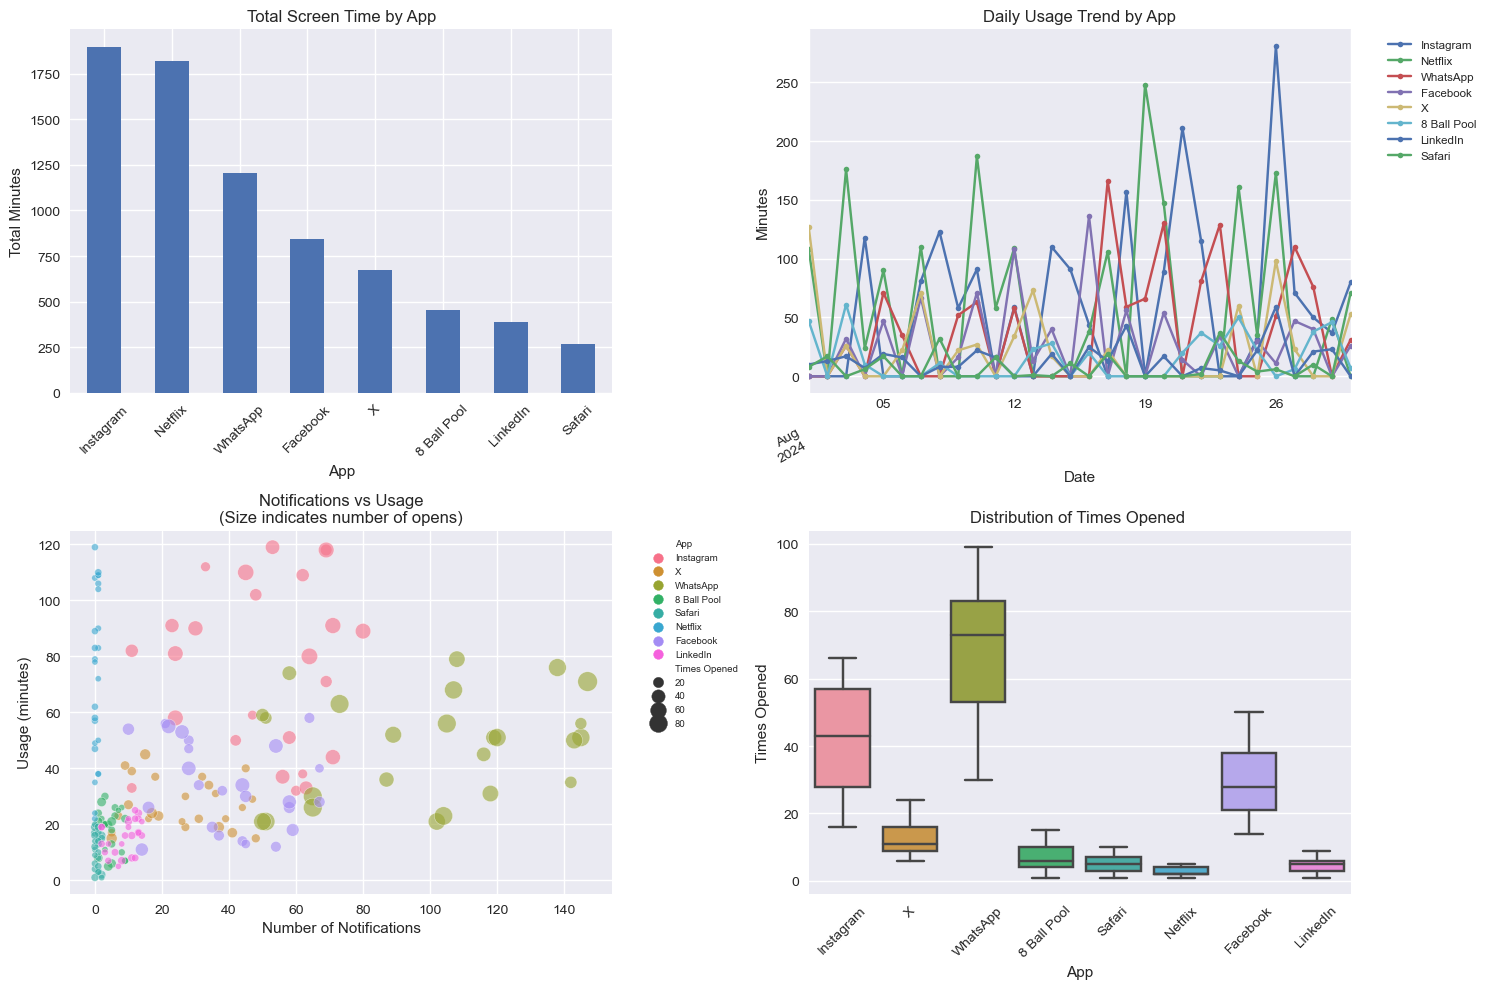

In [10]:
# Create visualizations from the key metrics
plt.style.use('seaborn')
fig = plt.figure(figsize=(15, 10))

# 1. Total Usage by App 
plt.subplot(2, 2, 1)
metrics['total_usage_by_app'].plot(kind='bar')
plt.title('Total Screen Time by App')
plt.xlabel('App')
plt.ylabel('Total Minutes')
plt.xticks(rotation=45)

# 2. Daily Usage Trends
plt.subplot(2, 2, 2)

# Create daily usage data
daily_usage = df.pivot_table(
    index='Date',
    columns='App',
    values='Usage (minutes)',
    aggfunc='sum',
    fill_value=0  # Fill missing values with 0
)

# Sort columns by total usage
daily_usage = daily_usage[metrics['total_usage_by_app'].index]

# Fill any remaining NaN values with 0
daily_usage = daily_usage.fillna(0)

# Format the plot
ax = daily_usage.plot(marker='o', markersize=4, linestyle='-', ax=plt.gca())
plt.title('Daily Usage Trend by App')
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.xticks(rotation=30, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# 3. Notifications vs Usage 
plt.subplot(2, 2, 3)
# Create size values based on Times Opened
size_values = df['Times Opened'] * 20  # Scale factor for better visibility
sns.scatterplot(
    data=df,
    x='Notifications',
    y='Usage (minutes)',
    hue='App',
    size='Times Opened',
    sizes=(20, 200),
    alpha=0.6
)
plt.title('Notifications vs Usage\n(Size indicates number of opens)')
plt.xlabel('Number of Notifications')
plt.ylabel('Usage (minutes)')
plt.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. Distribution of Times Opened 
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='App', y='Times Opened')
plt.title('Distribution of Times Opened ')
plt.xticks(rotation=45)

# Adjust the layout
plt.tight_layout()
plt.show()
plt.close()